In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
jio =  pd.read_csv("jio.csv")
jio.head()

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
0,28,209,7.464286,2724.464286,5.214286,2085.714286,1.0
1,24,179,7.458333,2722.291667,3.041667,1216.666667,1.0
2,20,149,7.450000,2719.250000,0.000000,0.000000,1.0
3,336,2545,7.574405,2764.657738,0.000000,0.000000,1.5
4,84,666,7.928571,2893.928571,129.270833,51708.333330,1.5


In [3]:
jio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days                    16 non-null     int64  
 1   Price                   16 non-null     int64  
 2   Price/Day               16 non-null     float64
 3   For 365 Days            16 non-null     float64
 4   Profit per customer     16 non-null     float64
 5   From 400 Million users  16 non-null     float64
 6   Data_per_day            16 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.0 KB


In [4]:
jio.describe()

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,76.687500,663.812500,9.306167,3396.750914,306.361219,122544.487586,1.718750
std,109.140716,845.097645,2.320658,847.040309,345.420462,138168.184724,0.604669
min,14.000000,119.000000,7.450000,2719.250000,0.000000,0.000000,1.000000
25%,23.750000,206.500000,7.809355,2850.414434,2.281250,912.500000,1.500000
50%,28.000000,279.000000,8.544643,3118.794643,294.933036,117973.214300,1.500000
75%,63.000000,566.250000,9.808036,3579.933035,388.228132,155291.252575,2.000000
max,365.000000,2879.000000,14.964286,5461.964286,1072.521739,429008.695700,3.000000


In [5]:
totalNullVal = jio.isnull().sum()
print(totalNullVal)

Days                      0
Price                     0
Price/Day                 0
For 365 Days              0
Profit per customer       0
From 400 Million users    0
Data_per_day              0
dtype: int64


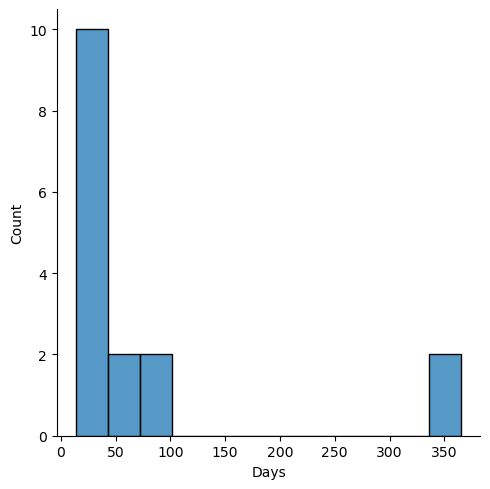

In [6]:
# perfoming EDA on the following feartures
# Days
sns.displot(jio, x = "Days")
# we can see that the most days they offer the prepaid plans are roughly between 20-40 days
# the days in which the dont offer the prepaid plans is between 110-340 days

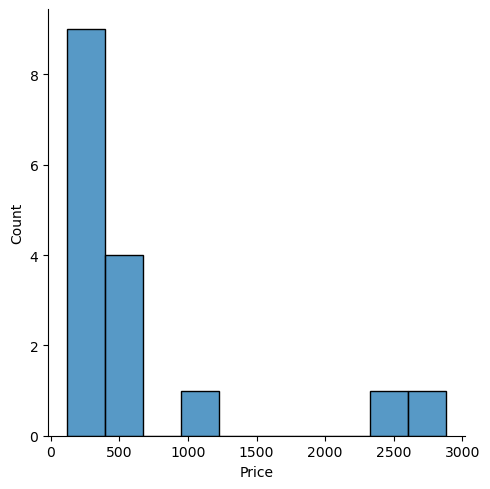

In [7]:
#Price
sns.displot(jio, x = "Price")
#we can see that the prices for the prepaid plan comes from roughly 200-400 prices rangen
#which also the cheapest 
# there are no prices between 1100-2400.

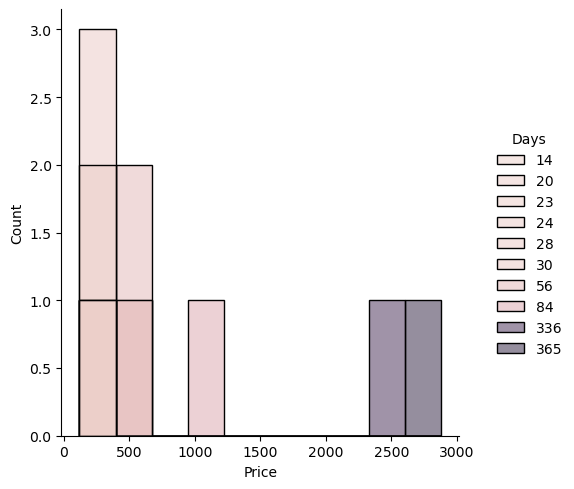

In [8]:
#Days VS Price comparison
sns.displot(jio, x = "Price", hue = "Days")
#as seen in the graph most of of the cheapest plans ranges from 14-84 days
#there is nothing for days in between 85-330 days most likely because they are no prepaid plans offered for those days
#

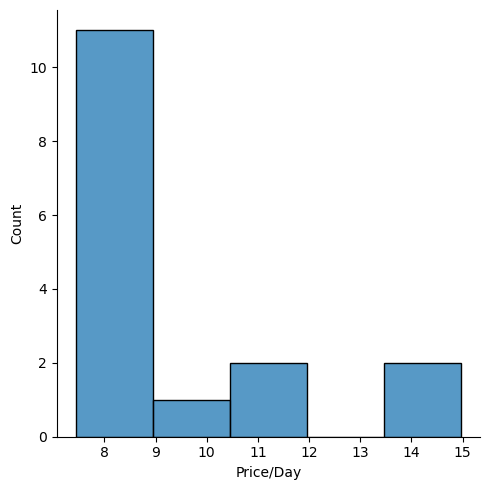

In [9]:
#price/day
sns.displot(jio, x = "Price/Day")

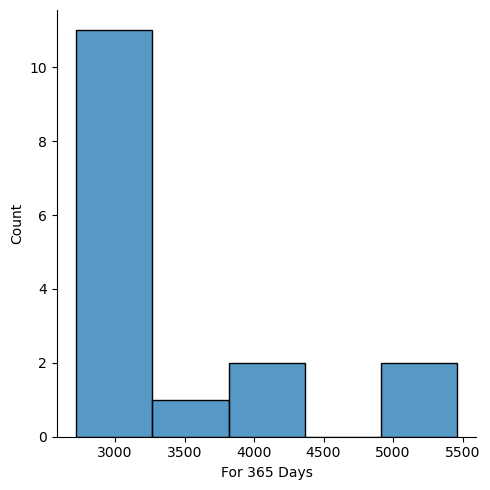

In [10]:
#For 365 days
sns.displot(jio, x = "For 365 Days")

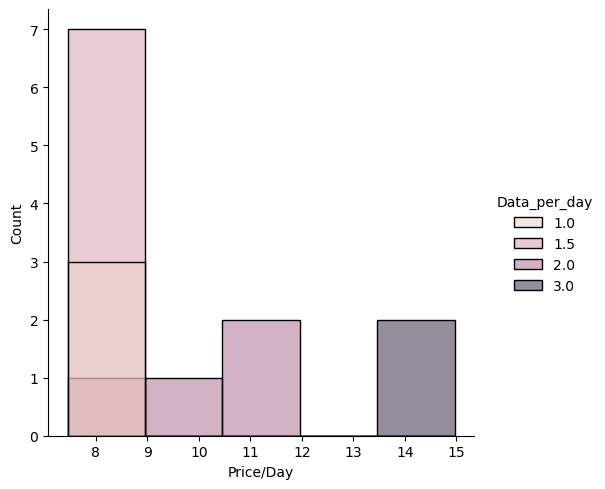

In [11]:
# price/day VS days 
sns.displot(jio, x = "Price/Day", hue = "Data_per_day")

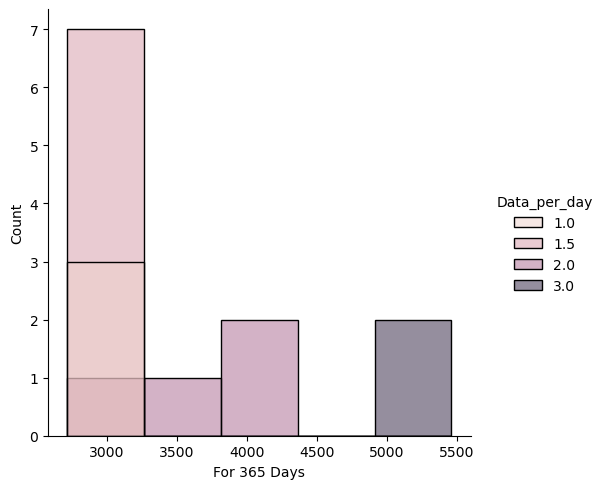

In [29]:
#For 365 Days VS Days
sns.displot(jio, x = "For 365 Days", hue = "Data_per_day")

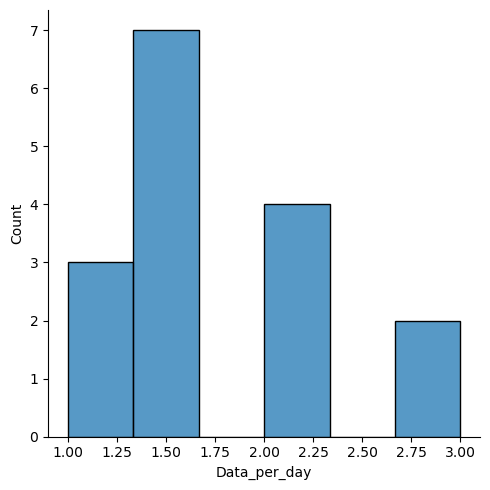

In [13]:
#Data_per_day 
sns.displot(jio, x = "Data_per_day")
# the most offered are 1.5Gb plans with 7 
# the least offered plans are 3Gb plans with 2

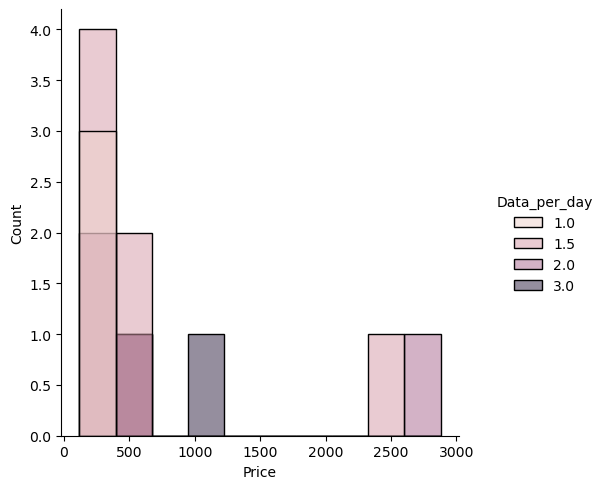

In [14]:
#Price VS Data_per_day 
sns.displot(jio, x = "Price", hue = "Data_per_day")

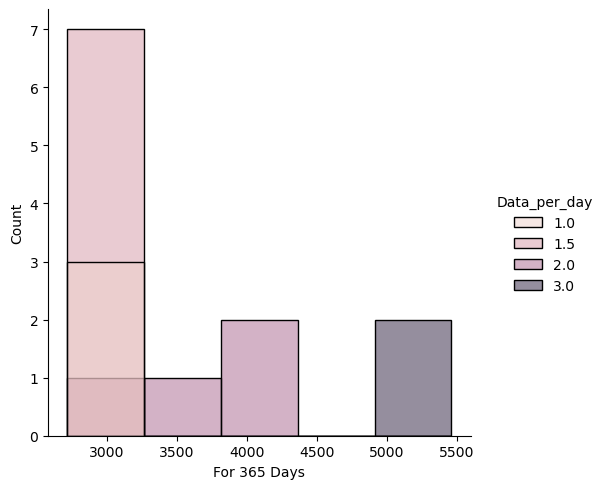

In [15]:
#for 365 days VS Data_per_day
sns.displot(jio, x = "For 365 Days", hue = "Data_per_day")

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Data_per_day'}>],
       [<Axes: title={'center': 'Profit per customer'}>, <Axes: >]],
      dtype=object)

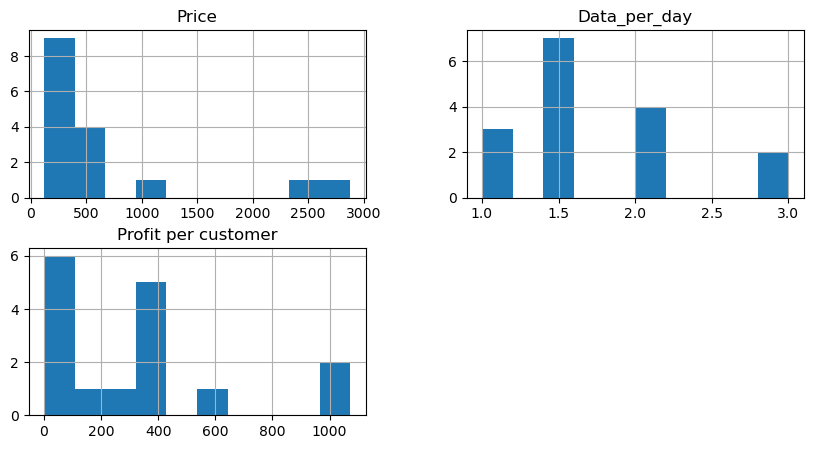

In [16]:
# visulizing the distribution between prices, data_per_day and profit per customer
jio[["Price", "Data_per_day", "Profit per customer"]].hist(figsize = (10, 5))

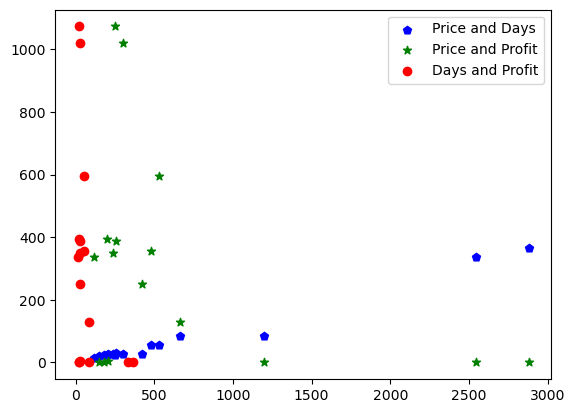

In [17]:
# examinimg the relationship between Price, Days and Profit per customer
plt.scatter(x = jio["Price"], y = jio["Days"], color = "b", marker = "p", label = "Price and Days")
plt.scatter(x = jio["Price"], y = jio["Profit per customer"], color = "g", marker = "*", label = "Price and Profit")
plt.scatter(x = jio["Days"], y = jio["Profit per customer"], color = "r", label = "Days and Profit")
plt.legend(loc = "upper right")
plt.show()

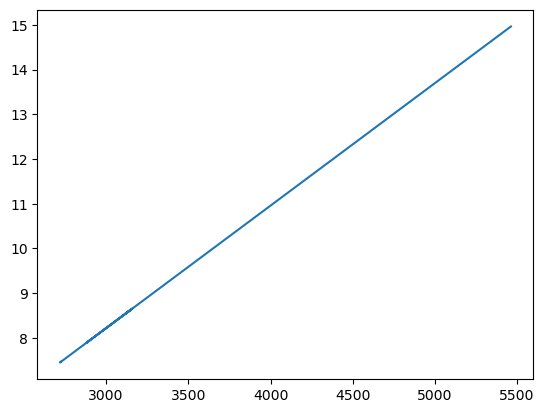

In [18]:
# showing trends between Price/Day and Prize for 365 days
#plt.plot(jio["Price/Day"], jio["Profit per customer"])
#plt.plot(jio["For 365 Days"], jio["Profit per customer"])
plt.plot(jio["For 365 Days"], jio["Price/Day"])
plt.show()

In [19]:
# finding the max profit based on Profit per customer
maxProfit =  jio["Profit per customer"].max()
print(maxProfit)

maxProfit_dataPlans = jio.loc[jio["Profit per customer"] == maxProfit, "Data_per_day"].iloc[0]
print(maxProfit_dataPlans, "Gb")


1072.521739
2.0 Gb


In [20]:
# finding the min profit based on Profit per customers
minProfit =  jio["Profit per customer"].min()
print(minProfit)

minProfit_dataPlans = jio.loc[jio["Profit per customer"] == minProfit, "Data_per_day"].iloc[1]
print(minProfit_dataPlans, "Gb")

0.0
1.5 Gb


In [21]:
Profit_dataPlans1 = jio.loc[jio["Data_per_day"] == 1.0, "Profit per customer"].iloc[1]
print(Profit_dataPlans1, "Rs")

3.041666667 Rs


In [22]:
Profit_dataPlans2 = jio.loc[jio["Data_per_day"] == 2.0, "Profit per customer"].iloc[1]
print(Profit_dataPlans2, "Rs")

595.0178571 Rs


In [23]:
Profit_dataPlans3 = jio.loc[jio["Data_per_day"] == 3.0, "Profit per customer"].iloc[1]
print(Profit_dataPlans3, "Rs")

252.0238095 Rs


In [24]:
Profit_dataPlans4 = jio.loc[jio["Data_per_day"] == 1.5, "Profit per customer"].iloc[1]
print(Profit_dataPlans4, "Rs")

129.2708333 Rs


In [25]:
revenue = jio["Profit per customer"].sum() / jio["Profit per customer"].count()
print(revenue)

306.3612189050625


In [26]:
# predictive modeling using logistic regression
# split the data into the feature and target variable

feature = ["Price", "Price/Day", "For 365 Days", "Profit per customer", "From 400 Million users", "Data_per_day"]
test = ["Days"]
X = jio[feature]
y = jio[test]

print(X)
print("\n")
print(y)

    Price  Price/Day  For 365 Days  Profit per customer  \
0     209   7.464286   2724.464286             5.214286   
1     179   7.458333   2722.291667             3.041667   
2     149   7.450000   2719.250000             0.000000   
3    2545   7.574405   2764.657738             0.000000   
4     666   7.928571   2893.928571           129.270833   
5     479   8.553571   3122.053571           357.395833   
6     259   8.633333   3151.166667           386.508929   
7     239   8.535714   3115.535714           350.877976   
8     199   8.652174   3158.043478           393.385740   
9     119   8.500000   3102.500000           337.842262   
10   2879   7.887671   2879.000000             0.000000   
11    533   9.517857   3474.017857           595.017857   
12    299  10.678571   3897.678571          1018.678571   
13    249  10.826087   3951.521739          1072.521739   
14   1199  14.273810   5209.940476             0.000000   
15    419  14.964286   5461.964286           252.023809 

In [27]:
# now we split the data using the train test split  method
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [28]:
# now we use logestic regression to predict 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(random_state = 10)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(y_pred)
print("\n")
print(accuracy)

[ 28 365  20  28  28]


0.2
